<a href="https://www.kaggle.com/code/mustafacihadgoktepe/human-stress-detection-in-and-through-sleep?scriptVersionId=140548296" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Welcome to this machine learning project focused on "Human Stress Detection in and through Sleep." In this project, we aim to leverage a dataset containing various physiological measurements during sleep to predict the stress levels experienced by individuals. Stress is a critical factor in overall well-being, and understanding its patterns during sleep can provide valuable insights into improving sleep quality and managing stress-related health issues.

## Dataset

The dataset used in this project includes a range of physiological features such as snoring rate, respiration rate, body temperature, limb movement, blood oxygen levels, eye movement, sleeping hours, and heart rate, alongside stress levels as the target variable. The data has been preprocessed and prepared for machine learning analysis.

## Methodology

We have followed a structured approach to building and evaluating our stress detection model:

1. **Data Preprocessing:** The dataset has undergone preprocessing steps to handle missing values, normalize features, and prepare it for model training.

2. **Feature Selection:** We have explored the relationship between the features and the target variable using techniques such as Mutual Information and Correlation analysis to select the most relevant features for our model.

3. **Model Selection:** We have considered a variety of machine learning algorithms, including Decision Trees, Logistic Regression, Gaussian Naive Bayes, Support Vector Machines, Random Forests, k-Nearest Neighbors, Stochastic Gradient Descent, and Gradient Boosting, to find the most suitable model for stress level prediction.

4. **Model Evaluation:** The models' performances have been evaluated using metrics such as accuracy, precision, recall, F1-score, and ROC AUC. Cross-validation has also been applied to ensure robustness.

## Results

Our initial results have shown promising accuracy scores with various classification models.

## Conclusion

Stress detection during sleep has the potential to improve overall health and well-being by identifying stress patterns that might otherwise go unnoticed. This project represents our initial efforts to create a reliable stress detection model, and we welcome feedback and suggestions from the Kaggle community to further enhance its accuracy and practicality.


## Dataset Overview

This dataset includes a range of physiological features recorded during sleep, which are as follows:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/kaggle/input/human-stress-detection-in-and-through-sleep/SaYoPillow.csv')
data

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


## Data Exploration

Before diving into modeling, it's crucial to explore and understand our dataset. We will perform the following steps:

1.  Check for missing values.
2.  Explore data types and statistics of the features.
3.  Rename columns for clarity.
4.  Provide a summary of the dataset's statistics.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [3]:
data.rename(columns={'sr': 'snoring rate', 'rr':'respiration rate', 't': 'body temperature', 'lm':'limb movement',
                            'bo':'blood oxygen', 'rem':'eye movement', 'sr.1':'sleeping hours', 'hr':'heart rate',
                            'sl':'stress level'}, inplace=True)
data.columns

Index(['snoring rate', 'respiration rate', 'body temperature', 'limb movement',
       'blood oxygen', 'eye movement', 'sleeping hours', 'heart rate',
       'stress level'],
      dtype='object')

In [4]:
data.describe()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


## Class Distribution

Let's start by examining the distribution of stress levels in our dataset to understand whether it's balanced or imbalanced:

In [5]:
data['stress level'].value_counts()

3    126
1    126
0    126
2    126
4    126
Name: stress level, dtype: int64

## Data Visualization

1.  Visualization can provide valuable insights into the data. We will use the Seaborn library to visualize the stress level distribution and explore relationships between features and stress levels:

<AxesSubplot:xlabel='stress level', ylabel='count'>

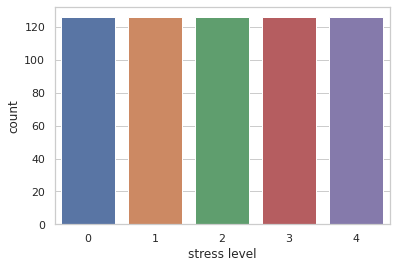

In [6]:
sns.set(style="whitegrid")
sns.countplot(x='stress level', data=data)

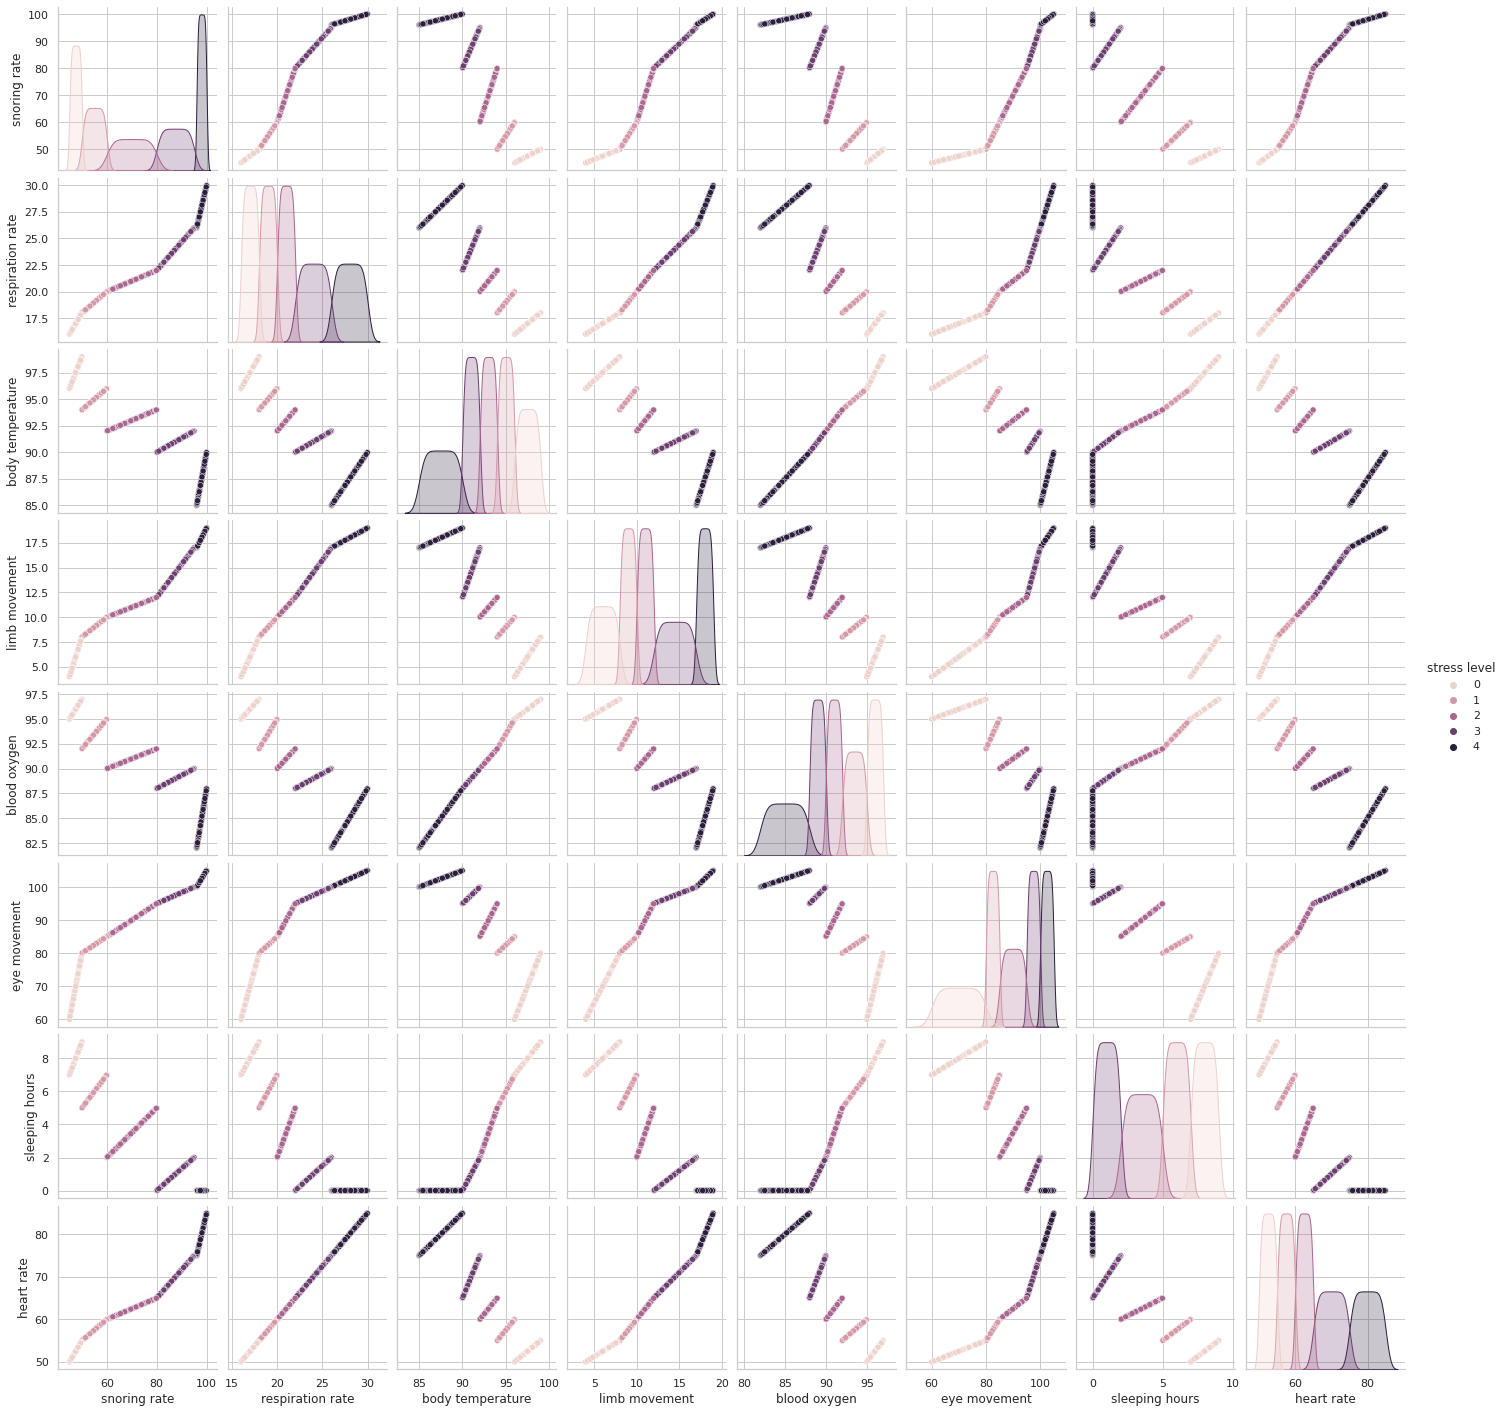

In [7]:
sns.pairplot(data, hue='stress level');

## Feature Scaling

Before feeding the data into machine learning models, it's essential to scale the features to the same range. We will use Min-Max scaling for this purpose:

In [8]:
from mlxtend.preprocessing import minmax_scaling

X = data.drop('stress level', axis=1)
y = pd.DataFrame(data['stress level'])

X_scaled = minmax_scaling(X, columns=X.columns)

## Feature Selection

Feature selection helps identify the most relevant features for our stress detection model. We will use Mutual Information and Correlation analysis to assess feature importance:

In [9]:
from sklearn.feature_selection import mutual_info_regression

mi = pd.DataFrame(mutual_info_regression(X_scaled, y), columns=['MI Scores'], index=X_scaled.columns)
corr = pd.DataFrame(X_scaled[X_scaled.columns].corrwith(y['stress level']), columns=['Correlation'])
s_corr = pd.DataFrame(X_scaled[X_scaled.columns].corrwith(y['stress level'], method='spearman'),
                      columns=['Spearman_Correlation'])

relation = mi.join(corr)
relation = relation.join(s_corr)
relation.sort_values(by='MI Scores', ascending=False)

,MI Scores,Correlation,Spearman_Correlation
snoring rate,1.598231,0.975322,0.979788
blood oxygen,1.594804,-0.961092,-0.979785
respiration rate,1.594309,0.963516,0.979785
eye movement,1.593669,0.951988,0.979785
heart rate,1.593171,0.963516,0.979785
limb movement,1.591862,0.971071,0.979785
body temperature,1.591816,-0.962354,-0.979785
sleeping hours,1.581894,-0.973036,-0.983435


## Data Splitting

Finally, we split the dataset into training and validation sets to facilitate model training and evaluation:

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state=42,
                                                      stratify = y, shuffle=True)

## Model Selection and Initial Evaluation

We have chosen the following machine learning models for stress level prediction:

- **Decision Tree Classifier**
- **Logistic Regression**
- **Gaussian Naive Bayes**
- **Linear Support Vector Classifier (Linear SVC)**
- **Support Vector Classifier (SVC)**
- **Random Forest Classifier**
- **k-Nearest Neighbors Classifier (KNN)**
- **Stochastic Gradient Descent Classifier (SGD)**
- **Gradient Boosting Classifier**

These models offer a variety of approaches, from decision trees to ensemble methods, allowing us to compare their performance.

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()
lr = LogisticRegression()
gnb = GaussianNB()
lsvc = LinearSVC()
svc = SVC()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
sgdc = SGDClassifier()
gbc = GradientBoostingClassifier()

models = [dtc, lr, gnb, lsvc, svc, rfc,  knn, sgdc, gbc]
model_name = ['Decision Tree', 'Logistic Regression', 'Gaussian Naive Bayes', 'Linear SVC', 'SVC', 'Random Forest',
              'KNN or k-Nearest Neighbors', 'Stochastic Gradient Descent', 'Gradient Boosting']

acc_scores = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc_model = round(accuracy_score(y_pred, y_valid) * 100, 2)
    acc_scores.append(acc_model)

In [12]:
models_acc = pd.DataFrame({'Model name': model_name, 'Accuracy scores': acc_scores})
models_acc.sort_values(by='Accuracy scores', ascending=False)

,Model name,Accuracy scores
1,Logistic Regression,100.00
2,Gaussian Naive Bayes,100.00
4,SVC,100.00
6,KNN or k-Nearest Neighbors,100.00
7,Stochastic Gradient Descent,100.00
3,Linear SVC,99.21
5,Random Forest,98.41
0,Decision Tree,97.62
8,Gradient Boosting,97.62


## Cross-Validation

We employ Repeated Stratified K-Fold Cross-Validation, which splits the dataset into multiple subsets while maintaining the distribution of stress levels. This process is repeated multiple times to obtain reliable results.

In [13]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
cv_mean_scores = []
for model in models:
    scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
    cv_mean_scores.append(scores.mean()*100)

In [14]:
models_val = pd.DataFrame({'Model name': model_name, 'Cross validation mean scores': cv_mean_scores})
models_val.sort_values(by='Cross validation mean scores', ascending=False)

,Model name,Cross validation mean scores
1,Logistic Regression,100.000000
2,Gaussian Naive Bayes,100.000000
4,SVC,100.000000
6,KNN or k-Nearest Neighbors,100.000000
3,Linear SVC,99.206349
5,Random Forest,99.153439
0,Decision Tree,98.730159
8,Gradient Boosting,98.677249
7,Stochastic Gradient Descent,92.380952


## Precision, Recall, and F1-Score

Precision, recall, and F1-score are important metrics for evaluating the model's performance, especially in multi-class classification tasks. They provide insights into how well the model performs for each class and its overall classification accuracy.

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = lr.predict(X_valid)

print('Precision score is: {:2f} \nRecall score is: {:2f} \nf1 score is: {:2f}'.format(
    precision_score(y_valid, y_pred, average='weighted'),
    recall_score(y_valid, y_pred, average='weighted'),
    f1_score(y_valid, y_pred, average='weighted')))

Precision score is: 1.000000 
Recall score is: 1.000000 
f1 score is: 1.000000


In [16]:
from sklearn.metrics import classification_report

report_svc = pd.DataFrame(classification_report(y_valid, y_pred, output_dict=True))
report_svc

,0,1,2,3,4,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
support,25.0,25.0,25.0,26.0,25.0,1.0,126.0,126.0


## Classification Report

A classification report provides a more comprehensive overview of the model's performance, including precision, recall, and F1-score for each individual class. It also includes support, which indicates the number of occurrences of each class in the validation dataset.

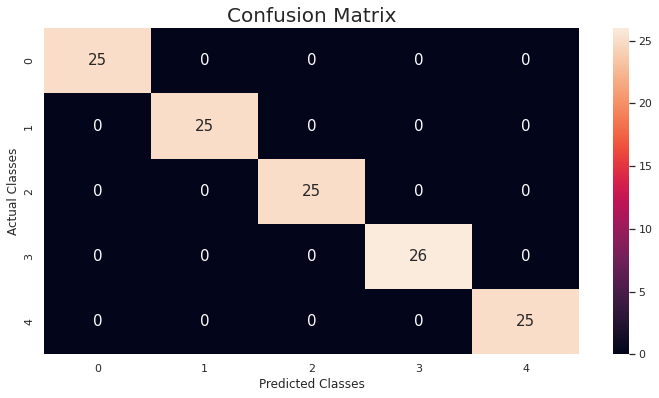

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid, y_pred)

cm_dataframe = pd.DataFrame(cm, columns=lr.classes_, index=lr.classes_)
plt.figure(figsize = (12,6));
p = sns.heatmap(cm_dataframe, annot=True, fmt="d", annot_kws={"fontsize":15});
p.set_title('Confusion Matrix', fontsize=20);
p.set_xlabel('Predicted Classes');
p.set_ylabel('Actual Classes');

## Conclusion

In this project, we've made significant strides in the field of human stress detection through sleep data analysis. We explored, preprocessed, and built machine learning models to predict stress levels during sleep.

Our models, including logistic regression, Gaussian Naive Bayes, SVM, and k-nearest neighbors, exhibited strong accuracy and promising performance. We assessed their precision, recall, and F1-score to understand their classification capabilities. We aim to make a meaningful impact on stress management and well-being through innovative sleep-based stress detection.

Thank you for reading.
